# Experiment 1c
>Tests how well transferring embedding works on a particular domain, without freezing embeddings.

This includes 
1. Get two datasets, `datasetA` and `datasetB`.

#### Getting Embeddings
2. Train `modelA` on `datasetA` as well as we can.
3. Extract embeddings from `modelA`.

#### Using Embeddings
4. Perform `transfer` from `modelA` to `modelB`.
5. Split `datasetB` into `datasetBtrain` and `datasetBval`.
6. Initialize `modelC` and make the sure it uses same classifier weights as `modelB`.
6. Do a validation pass for `modelB` and `modelC` on `datasetBval` and log stuff.
7. **Finetune `modelB` using `datasetBtrain`. Log stuff.**
8. **Train `modelC` on `datasetBtrain`. Log stuff.**

#### Interpretation
9. Compare obtained metrics.
10. Plot embeddings for the three models and compare. [sklearn tsne](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) 


Notes:
Save `model.state_dict()`, and transferembeds json for `modelA`, `modelB`, `modelC`.
`datasetA`: `census_income`
`datasetB`: `adult` (full)

In [ ]:
#skip
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *
from transfertab.extract import *
from fastcore.xtras import *
from fastai.learner import *
import numpy as np
from fastai.interpret import *
import sklearn.metrics as skm

In [ ]:
#skip
import wandb
from fastai.callback.wandb import *

In [ ]:
# wandb.login()

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter:  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /Users/manikyabardhan/.netrc


True

## Step 1
Getting datasets A & B.

In [ ]:
#skip
dfA = pd.read_csv("../data/census-income.csv")
dfB = pd.read_csv('../data/adult.csv')

## Steps 2-3

Training `modelA` on `census-income` dataset and then extracting embeddings.

In [ ]:
#skip
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp1c', 
    job_type='basetrain', 
    tags=['base', 'census'], 
    name='modelA training',
    notes="Training modelA from which we'll take embeddings",
    reinit=True
)

wandb: Currently logged in as: manikya (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [ ]:
#skip
splitsA = RandomSplitter(valid_pct=0.2)(range_of(dfA))
toA = TabularPandas(dfA, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"],
                   y_names='salary',
                   splits=splitsA)
dlsA = toA.dataloaders(bs=128)
learnA = tabular_learner(dlsA, metrics=accuracy)

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.03981071710586548)

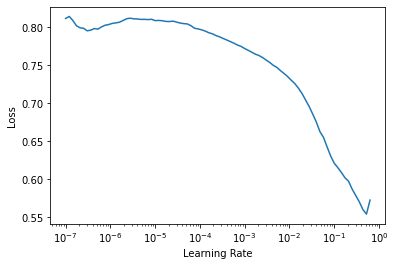

In [ ]:
#skip
learnA.lr_find()

In [ ]:
#skip
cbs=[WandbCallback(log="all", dataset_name="census-income", n_preds=128, seed=1), SaveModelCallback()]
learnA.fit_one_cycle(10, cbs=cbs, lr_max=0.03)

epoch,train_loss,valid_loss,accuracy,time
0,0.158948,0.146342,0.944216,00:23
1,0.146026,0.146362,0.941911,00:32
2,0.144553,0.154745,0.941911,00:31
3,0.140128,0.148060,0.944692,00:41
4,0.140294,0.140350,0.945544,00:35
5,0.148386,0.143227,0.943113,00:33
6,0.135902,0.140409,0.945469,00:36
7,0.140423,0.139696,0.946371,00:35
8,0.145470,0.139170,0.946246,00:34
9,0.128673,0.139143,0.946396,00:32


Better model found at epoch 0 with valid_loss value: 0.1463421881198883.
Better model found at epoch 4 with valid_loss value: 0.14034968614578247.
Better model found at epoch 7 with valid_loss value: 0.13969573378562927.
Better model found at epoch 8 with valid_loss value: 0.13916952908039093.
Better model found at epoch 9 with valid_loss value: 0.13914284110069275.


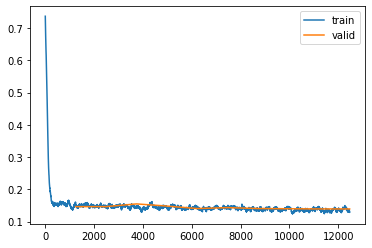

In [ ]:
#skip
learnA.recorder.plot_loss()

In [ ]:
#skip
torch.save(learnA.model.state_dict(),"../results/exp1c/modelA_state_dict")

In [ ]:
#skip
learnA.model.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(18, 8)
  (2): Embedding(4, 3)
  (3): Embedding(8, 5)
  (4): Embedding(25, 10)
  (5): Embedding(16, 8)
  (6): Embedding(6, 4)
  (7): Embedding(11, 6)
  (8): Embedding(3, 3)
  (9): Embedding(4, 3)
  (10): Embedding(7, 5)
  (11): Embedding(9, 5)
  (12): Embedding(7, 5)
  (13): Embedding(7, 5)
  (14): Embedding(52, 15)
  (15): Embedding(39, 12)
  (16): Embedding(9, 5)
  (17): Embedding(11, 6)
  (18): Embedding(10, 6)
  (19): Embedding(11, 6)
  (20): Embedding(4, 3)
  (21): Embedding(5, 4)
  (22): Embedding(6, 4)
  (23): Embedding(44, 13)
  (24): Embedding(44, 13)
  (25): Embedding(44, 13)
  (26): Embedding(6, 4)
  (27): Embedding(4, 3)
)

In [ ]:
#skip
learnA.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(18, 8)
    (2): Embedding(4, 3)
    (3): Embedding(8, 5)
    (4): Embedding(25, 10)
    (5): Embedding(16, 8)
    (6): Embedding(6, 4)
    (7): Embedding(11, 6)
    (8): Embedding(3, 3)
    (9): Embedding(4, 3)
    (10): Embedding(7, 5)
    (11): Embedding(9, 5)
    (12): Embedding(7, 5)
    (13): Embedding(7, 5)
    (14): Embedding(52, 15)
    (15): Embedding(39, 12)
    (16): Embedding(9, 5)
    (17): Embedding(11, 6)
    (18): Embedding(10, 6)
    (19): Embedding(11, 6)
    (20): Embedding(4, 3)
    (21): Embedding(5, 4)
    (22): Embedding(6, 4)
    (23): Embedding(44, 13)
    (24): Embedding(44, 13)
    (25): Embedding(44, 13)
    (26): Embedding(6, 4)
    (27): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=183, out_fe

In [ ]:
#skip
learnA.embeds[-1].weight

Parameter containing:
tensor([[-1.9202e-04, -7.4663e-04,  2.1195e-03],
        [-1.9953e+00, -2.3478e+00, -1.8593e+00],
        [-8.4477e-03, -2.3337e-01,  4.4425e-03],
        [ 1.5410e+00,  1.3829e+00,  1.4453e+00]], requires_grad=True)

In [ ]:
#skip
catcolsA = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"]
catdictA = {col:list(learnA.dls.categorify.classes[col]) for col in catcolsA}
extractembeds(learnA.model, catdictA, transfercats=catcolsA, allcats=catcolsA, path="../results/exp1c/learnA_extracts", kind="bson");

In [ ]:
#skip
wandb.finish()

epoch,10
train_loss,0.12867
raw_loss,0.14277
wd_0,0.01
sqr_mom_0,0.99
lr_0,0.0
mom_0,0.95
eps_0,1e-05
_runtime,1355
_timestamp,1631818558
_step,12469


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_loss,█▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▁▁▁▁▁▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁
raw_loss,▄▄▄▄▆▄▂▃▃█▅▂▄▁▆▅▄▁▇▄▅▃▂▅▅▄▆▄▅▄▇▃▄▅▃▄▄▄▆▅
wd_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sqr_mom_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▂▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
mom_0,██▇▆▅▄▃▂▂▁▁▁▁▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇▇█████
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
_timestamp,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


## Step 4 & 5
Transferring embeddings from `modelA` to randomly initialized `modelB` consistent with `adult` dataset. 
Split `adult` into training and validation subsets.

In [ ]:
# \([0-9]*\): Embedding

In [ ]:
#skip
emb_szs = (
  (10, 6),
  (18, 8),
  (4, 3),
  (8, 5),
  (25, 10),
  (16, 8),
  (6, 4),
  (11, 6),
  (3, 3),
  (4, 3),
  (7, 5),
  (9, 5),
  (7, 5),
  (7, 5),
  (52, 15),
  (39, 12),
  (9, 5),
  (11, 6),
  (10, 6),
  (11, 6),
  (4, 3),
  (5, 4),
  (6, 4),
  (44, 13),
  (44, 13),
  (44, 13),
  (6, 4),
  (4, 3),
)

new_modelA = TabularModel(emb_szs, 0, 2, [200, 100])
# load_model('./models/model.pth', new_modelA, "test", with_opt=False)
new_modelA.load_state_dict(torch.load("../results/exp1c/modelA_state_dict"))

<All keys matched successfully>

In [ ]:
#skip
new_modelA.embeds[-1].weight

Parameter containing:
tensor([[-1.9202e-04, -7.4663e-04,  2.1195e-03],
        [-1.9953e+00, -2.3478e+00, -1.8593e+00],
        [-8.4477e-03, -2.3337e-01,  4.4425e-03],
        [ 1.5410e+00,  1.3829e+00,  1.4453e+00]], requires_grad=True)

In [ ]:
#skip
splitsB = RandomSplitter(valid_pct=0.2)(range_of(dfB))
toB = TabularPandas(dfB, procs=[Categorify, FillMissing, Normalize],
                   cat_names = [' workclass', ' education', ' marital_status', ' occupation', ' relationship', ' race'],
                   cont_names = ['age', ' fnlwgt', ' education_num'],
                   y_names=' salary',
                   splits=splitsB)
dlsB = toB.dataloaders(bs=256)

In [ ]:
#skip
learnB = tabular_learner(dlsB, metrics=accuracy, emb_szs={' relationship':12})

In [ ]:
#skip
metadict_path = Path("../data/jsons/metadict_adult2census.json")
with open(metadict_path, 'r') as j:
     metadict = json.loads(j.read())
metadict;

In [ ]:
#skip
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[ 0.0142,  0.0100, -0.0143,  0.0073],
        [ 0.0105, -0.0045,  0.0026,  0.0020],
        [-0.0028,  0.0115,  0.0002,  0.0129],
        [ 0.0120, -0.0116,  0.0012, -0.0033],
        [-0.0150, -0.0100, -0.0086,  0.0017],
        [-0.0008, -0.0050,  0.0059,  0.0041]], requires_grad=True)

In [ ]:
#skip
transfer_cats = (" workclass", " marital_status", " race", " relationship", " education")
catcolsB = tuple(learnB.dls.cat_names)
catdictB = {col:list(learnB.dls.categorify.classes[col]) for col in catcolsB}
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfer_cats, 
    newcatcols=catcolsB, 
    oldcatcols=catcolsA, 
    oldcatdict=catdictA, 
    newcatdict=catdictB)

In [ ]:
#skip
learnA.model.embeds[catcolsA.index('education')].weight

Parameter containing:
tensor([[ 1.4507e-03, -1.7816e-03, -4.5182e-04, -1.8841e-03,  1.6511e-04,
         -1.6063e-03,  1.3733e-03, -5.6074e-04],
        [ 1.7646e+00,  1.7548e+00,  1.6959e+00, -2.1733e+00, -2.5880e+00,
         -1.7598e+00,  1.7281e+00,  1.7162e+00],
        [ 1.5070e+00,  1.4987e+00,  1.4411e+00, -2.1786e+00, -1.8106e+00,
         -1.5247e+00,  1.4846e+00,  1.4793e+00],
        [ 1.6657e+00,  1.6711e+00,  1.6818e+00, -1.7459e-01, -7.3531e-01,
         -1.5861e+00,  1.6702e+00,  1.6637e+00],
        [ 1.5446e+00,  1.5431e+00,  1.5408e+00, -1.1856e+00, -1.1008e+00,
         -1.4705e+00,  1.5405e+00,  1.5294e+00],
        [ 2.0376e+00,  2.0200e+00,  2.0244e+00, -1.8346e+00, -1.9308e+00,
         -1.9511e+00,  2.0175e+00,  2.0018e+00],
        [ 1.8135e+00,  1.8132e+00,  1.7658e+00, -1.0531e+00, -1.2896e+00,
         -1.7748e+00,  1.7824e+00,  1.7780e+00],
        [ 1.7921e+00,  1.7714e+00,  1.7686e+00, -2.0866e+00, -2.0459e+00,
         -1.7134e+00,  1.7691e+00,  1.7557e

In [ ]:
#skip
learnB.model.embeds[catcolsB.index(' education')].weight

Parameter containing:
tensor([[ 1.4507e-03, -1.7816e-03, -4.5182e-04, -1.8841e-03,  1.6511e-04,
         -1.6063e-03,  1.3733e-03, -5.6074e-04],
        [ 1.7646e+00,  1.7548e+00,  1.6959e+00, -2.1733e+00, -2.5880e+00,
         -1.7598e+00,  1.7281e+00,  1.7162e+00],
        [ 1.5070e+00,  1.4987e+00,  1.4411e+00, -2.1786e+00, -1.8106e+00,
         -1.5247e+00,  1.4846e+00,  1.4793e+00],
        [ 1.6657e+00,  1.6711e+00,  1.6818e+00, -1.7459e-01, -7.3531e-01,
         -1.5861e+00,  1.6702e+00,  1.6637e+00],
        [ 1.4789e-01,  1.5248e-01,  1.8233e-01, -4.0595e-02,  2.1710e-01,
         -1.1232e-01,  1.6193e-01,  1.5807e-01],
        [ 3.9440e-01,  3.9093e-01,  4.2413e-01, -3.6511e-01, -1.9788e-01,
         -3.5262e-01,  4.0046e-01,  3.9422e-01],
        [ 1.8135e+00,  1.8132e+00,  1.7658e+00, -1.0531e+00, -1.2896e+00,
         -1.7748e+00,  1.7824e+00,  1.7780e+00],
        [ 1.7921e+00,  1.7714e+00,  1.7686e+00, -2.0866e+00, -2.0459e+00,
         -1.7134e+00,  1.7691e+00,  1.7557e

## Step 6
Initialize `modelC` with same classifier weights as `modelB`.

In [ ]:
#skip
dlsC = deepcopy(dlsB)
learnC = tabular_learner(dlsC, metrics=accuracy, emb_szs={' relationship':12})

In [ ]:
#skip
learnC.model.layers[0][0].weight

Parameter containing:
tensor([[ 0.0798,  0.1092,  0.1147,  ..., -0.1457, -0.1431, -0.0635],
        [ 0.0111,  0.0763, -0.1410,  ..., -0.0793, -0.1313,  0.0582],
        [-0.1117, -0.0091, -0.0304,  ...,  0.0183, -0.1071, -0.0097],
        ...,
        [ 0.1164,  0.0079,  0.1130,  ..., -0.1389, -0.0168,  0.0638],
        [-0.1048, -0.1406, -0.1218,  ...,  0.1319, -0.0497, -0.1214],
        [ 0.0215, -0.0821, -0.0383,  ...,  0.0348,  0.1008,  0.0184]],
       requires_grad=True)

In [ ]:
#skip
learnC.model.layers.load_state_dict(learnB.model.layers.state_dict())

<All keys matched successfully>

In [ ]:
#skip
learnC.model.layers[0][0].weight

Parameter containing:
tensor([[-0.1073, -0.0332, -0.0962,  ...,  0.1260,  0.0125, -0.0106],
        [ 0.1438,  0.1016,  0.0015,  ..., -0.0944,  0.0115, -0.0234],
        [-0.0704,  0.0832, -0.0904,  ...,  0.1074, -0.0750, -0.0512],
        ...,
        [ 0.0042,  0.1228,  0.0002,  ...,  0.0861, -0.0895, -0.1421],
        [-0.0238,  0.0789, -0.0702,  ..., -0.0716, -0.0874, -0.0290],
        [-0.0146, -0.0887,  0.0006,  ...,  0.0554, -0.0540, -0.0881]],
       requires_grad=True)

In [ ]:
#skip
learnB.model.layers[0][0].weight

Parameter containing:
tensor([[-0.1073, -0.0332, -0.0962,  ...,  0.1260,  0.0125, -0.0106],
        [ 0.1438,  0.1016,  0.0015,  ..., -0.0944,  0.0115, -0.0234],
        [-0.0704,  0.0832, -0.0904,  ...,  0.1074, -0.0750, -0.0512],
        ...,
        [ 0.0042,  0.1228,  0.0002,  ...,  0.0861, -0.0895, -0.1421],
        [-0.0238,  0.0789, -0.0702,  ..., -0.0716, -0.0874, -0.0290],
        [-0.0146, -0.0887,  0.0006,  ...,  0.0554, -0.0540, -0.0881]],
       requires_grad=True)

## Step 7
Validation pass for modelB

In [ ]:
#skip
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [ ]:
#skip
intepret_learnB.print_classification_report()

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4953
        >50K       0.00      0.00      0.00      1559

    accuracy                           0.76      6512
   macro avg       0.38      0.50      0.43      6512
weighted avg       0.58      0.76      0.66      6512



/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
#skip
dB,tB = flatten_check(intepret_learnB.decoded, intepret_learnB.targs)
reportB=skm.classification_report(tB, dB, labels=list(intepret_learnB.vocab.o2i.values()), target_names=[str(v) for v in intepret_learnB.vocab],output_dict=True)

/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
#skip
intepret_learnB_report = pd.DataFrame(reportB).transpose()

In [ ]:
#skip
intepret_learnB_report.to_csv("../results/exp1c/Step6-Validation-ModelB")

In [ ]:
#skip
intepret_learnC = ClassificationInterpretation.from_learner(learnC)
dC,tC = flatten_check(intepret_learnC.decoded, intepret_learnC.targs)
reportC=skm.classification_report(tC, dC, labels=list(intepret_learnC.vocab.o2i.values()), target_names=[str(v) for v in intepret_learnC.vocab],output_dict=True)
intepret_learnC_report = pd.DataFrame(reportC).transpose()
intepret_learnC_report.to_csv("../results/exp1c/Step6-Validation-ModelC")

/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
#skip
intepret_learnC.print_classification_report()

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4953
        >50K       0.00      0.00      0.00      1559

    accuracy                           0.76      6512
   macro avg       0.38      0.50      0.43      6512
weighted avg       0.58      0.76      0.66      6512



/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manikyabardhan/anaconda3/envs/fastenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Step 7
Finetune modelB.

In [ ]:
#skip
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp1c', 
    job_type='finetune', 
    tags=['transfer', 'adult'], 
    name='modelB training',
    notes='Training modelB which contains transferred embeddings for " workclass", " marital_status", " race", " relationship", " education"',
    reinit=True
)

wandb: wandb version 0.12.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [ ]:
#skip
learnB.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 12)
    (5): Embedding(6, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=46, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [ ]:
#skip
for i in range(len(catcolsB)):
    learnB.model.embeds[i].weight.requires_grad = False
learnB.create_opt()

In [ ]:
#skip
learnB.embeds[5].weight

Parameter containing:
tensor([[ 1.3111e-03, -9.3459e-04,  8.4980e-04, -1.5825e-03],
        [-7.1275e-01,  1.1130e+00, -2.1454e+00,  2.2315e+00],
        [ 2.6314e-01, -7.9928e-02,  5.1556e-01, -4.6700e-01],
        [-1.4039e+00, -6.0671e-01, -1.3691e+00,  1.1184e+00],
        [ 7.3182e-01,  7.3646e-01,  7.2689e-01, -5.0618e-01],
        [ 1.7532e-01, -1.0889e-01,  6.3369e-01, -5.4034e-01]])

In [ ]:
#skip
learnB.layers[0][0].weight

Parameter containing:
tensor([[-0.1073, -0.0332, -0.0962,  ...,  0.1260,  0.0125, -0.0106],
        [ 0.1438,  0.1016,  0.0015,  ..., -0.0944,  0.0115, -0.0234],
        [-0.0704,  0.0832, -0.0904,  ...,  0.1074, -0.0750, -0.0512],
        ...,
        [ 0.0042,  0.1228,  0.0002,  ...,  0.0861, -0.0895, -0.1421],
        [-0.0238,  0.0789, -0.0702,  ..., -0.0716, -0.0874, -0.0290],
        [-0.0146, -0.0887,  0.0006,  ...,  0.0554, -0.0540, -0.0881]],
       requires_grad=True)

In [ ]:
#skip
cbsB=[WandbCallback(log="all", dataset_name="adult", n_preds=128, seed=1), SaveModelCallback()]
learnB.fit_one_cycle(1, cbs=cbsB)

epoch,train_loss,valid_loss,accuracy,time
0,0.492397,0.471082,0.805129,00:01


Better model found at epoch 0 with valid_loss value: 0.47108179330825806.


In [ ]:
#skip
for i in range(len(catcolsB)):
    learnB.model.embeds[i].weight.requires_grad = True
learnB.create_opt()

In [ ]:
#skip
learnB.embeds[-1].weight

Parameter containing:
tensor([[ 1.3111e-03, -9.3459e-04,  8.4980e-04, -1.5825e-03],
        [-7.1275e-01,  1.1130e+00, -2.1454e+00,  2.2315e+00],
        [ 2.6314e-01, -7.9928e-02,  5.1556e-01, -4.6700e-01],
        [-1.4039e+00, -6.0671e-01, -1.3691e+00,  1.1184e+00],
        [ 7.3182e-01,  7.3646e-01,  7.2689e-01, -5.0618e-01],
        [ 1.7532e-01, -1.0889e-01,  6.3369e-01, -5.4034e-01]],
       requires_grad=True)

In [ ]:
#skip
learnB.fit_one_cycle(2, cbs=cbsB)

epoch,train_loss,valid_loss,accuracy,time
0,0.412158,0.376959,0.833538,00:01
1,0.361092,0.363597,0.835381,00:09


Better model found at epoch 0 with valid_loss value: 0.37695854902267456.
Better model found at epoch 1 with valid_loss value: 0.3635970652103424.


In [ ]:
#skip
learnB.fit_one_cycle(1, cbs=cbsB)

epoch,train_loss,valid_loss,accuracy,time
0,0.353168,0.357309,0.836149,00:01


Better model found at epoch 0 with valid_loss value: 0.35730892419815063.


In [ ]:
#skip
learnB.embeds[-1].weight

Parameter containing:
tensor([[ 1.3091e-03, -9.3316e-04,  8.4850e-04, -1.5801e-03],
        [-7.2138e-01,  1.1078e+00, -2.1380e+00,  2.2279e+00],
        [ 2.9455e-01, -5.7048e-02,  5.1236e-01, -4.7272e-01],
        [-1.3826e+00, -5.9556e-01, -1.3616e+00,  1.1046e+00],
        [ 7.4840e-01,  7.7091e-01,  7.2122e-01, -5.0608e-01],
        [ 1.6296e-01, -1.1749e-01,  6.3543e-01, -5.2904e-01]],
       requires_grad=True)

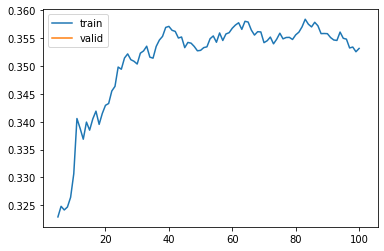

In [ ]:
#skip
learnB.recorder.plot_loss()

In [ ]:
#skip
wandb.finish()

epoch,4
train_loss,0.35317
raw_loss,0.37842
wd_0,0.01
sqr_mom_0,0.99
lr_0,0.0
mom_0,0.94996
eps_0,1e-05
_runtime,226
_timestamp,1631820342
_step,405


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_loss,█▇▆▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▂▂▂▂▂▂▁
raw_loss,█▆▅▄▅▄▄▄▄▄▃▄▃▃▃▂▂▃▃▃▂▂▁▂▂▂▃▂▂▂▁▂▁▃▂▃▂▁▁▂
wd_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sqr_mom_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▂▄██▇▆▅▃▂▁▁▂▄▆████▇▇▆▅▅▄▃▂▂▁▁▁▂▆██▇▆▄▃▁▁
mom_0,█▅▁▁▂▃▄▆▇██▇▅▃▁▁▁▁▂▂▃▄▄▅▆▇▇████▃▁▁▂▃▅▆██
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃██████████
_timestamp,▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃██████████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


## Step 8

In [ ]:
#skip
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp1c', 
    job_type='controlgrp', 
    tags=['base', 'adult'], 
    name='modelC training',
    notes='Training modelC which contains randomly initialized weights and same classifier weights as modelB',
    reinit=True
)

wandb: wandb version 0.12.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [ ]:
#skip
cbsC=[WandbCallback(log="all", dataset_name="adult", n_preds=128, seed=1), SaveModelCallback()]
learnC.fit_one_cycle(4, cbs=cbsC)

epoch,train_loss,valid_loss,accuracy,time
0,0.524250,0.467839,0.796990,00:04
1,0.403883,0.372212,0.830467,00:09
2,0.361470,0.357796,0.832617,00:08
3,0.347912,0.355953,0.833538,00:07


Better model found at epoch 0 with valid_loss value: 0.46783900260925293.
Better model found at epoch 1 with valid_loss value: 0.37221238017082214.
Better model found at epoch 2 with valid_loss value: 0.35779625177383423.
Better model found at epoch 3 with valid_loss value: 0.35595300793647766.


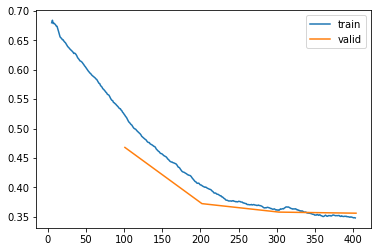

In [ ]:
#skip
learnC.recorder.plot_loss()

In [ ]:
#skip
wandb.finish()

epoch,4
train_loss,0.34791
raw_loss,0.32487
wd_0,0.01
sqr_mom_0,0.99
lr_0,0.0
mom_0,0.95
eps_0,1e-05
_runtime,54
_timestamp,1631820674
_step,403


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_loss,██▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
raw_loss,█▆▆▆▆▄▄▄▃▄▃▄▂▃▂▃▃▂▂▁▃▁▂▂▂▂▂▂▂▁▂▁▂▁▂▂▁▂▂▁
wd_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sqr_mom_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
mom_0,██▇▆▅▄▃▂▂▁▁▁▁▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇▇█████
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▁▁▁▁▁▁▁▁▃▃▄▄▄▄▄▄▄▄▆▆▆▆▆▆▆▆▆▆▇▇▇███████
_timestamp,▁▁▁▁▁▁▁▁▁▁▃▃▄▄▄▄▄▄▄▄▆▆▆▆▆▆▆▆▆▆▇▇▇███████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [ ]:
#skip
learnB.model.embeds.state_dict()['0.weight']

tensor([[ 2.9931e-05,  2.8169e-03, -1.0854e-03, -6.5014e-04, -7.1729e-04,
         -2.2243e-04],
        [-3.7331e-01,  7.2444e-01, -9.6488e-01, -3.1515e-01,  7.2192e-01,
         -2.9967e-01],
        [ 4.6477e-01, -1.0390e+00, -7.4647e-01, -7.8644e-01, -1.0744e+00,
         -5.5194e-02],
        [-4.0834e-01,  4.1289e-01,  2.8852e-01,  9.4725e-01,  4.4041e-01,
         -3.5451e-01],
        [ 1.1802e-01, -2.0689e-01,  1.1025e-01,  2.5589e-01, -2.1081e-01,
          1.2100e-01],
        [ 5.2560e-02, -2.7222e-01, -6.8828e-01, -6.4219e-01, -3.0519e-01,
         -1.0339e-01],
        [-8.6160e-02, -2.4890e+00,  1.3428e+00,  2.0030e-01, -2.4939e+00,
          5.1231e-01],
        [ 4.9094e-01,  2.9757e-01,  2.2930e+00,  1.8825e+00,  3.6363e-01,
          9.5631e-01],
        [ 1.1688e+00,  1.1186e+00,  3.6269e-01,  1.1210e+00,  1.1486e+00,
          6.7697e-01],
        [-8.3682e-01,  3.8593e+00, -2.1245e+00, -6.7106e-01,  3.9410e+00,
         -1.1594e+00]])

In [ ]:
#skip
learnC.model.embeds.state_dict()['0.weight']

tensor([[-0.0016, -0.0061, -0.0029,  0.0069, -0.0095,  0.0029],
        [-0.0046,  0.0249,  0.0138,  0.0042,  0.0004, -0.0141],
        [-0.0182, -0.0353, -0.0419, -0.0122, -0.0436,  0.0486],
        [-0.0176,  0.0131,  0.0235,  0.0016,  0.0024, -0.0007],
        [ 0.0134,  0.0144,  0.0017,  0.0036, -0.0117,  0.0026],
        [-0.0122, -0.0194, -0.0102, -0.0321, -0.0221, -0.0118],
        [ 0.0077, -0.0225, -0.0540, -0.0010, -0.0246,  0.0730],
        [ 0.0611,  0.0309,  0.0349,  0.0424,  0.0240, -0.0347],
        [-0.0099,  0.0529,  0.0344,  0.0065,  0.0173,  0.0165],
        [ 0.0342,  0.0383,  0.0611,  0.0276,  0.0585, -0.0494]])

In [ ]:
#skip
torch.save(learnB.model.state_dict(),"../results/exp1c/modelB_state_dict")
torch.save(learnC.model.state_dict(),"../results/exp1c/modelC_state_dict")

# Step 9